In [111]:
import sys
import os
import json
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Tools import *
from Cluster import *

In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
FoundationCourses, (n_samples, n_feature), labels_name = load_file_json("../Data/FoundationCourses.json")
print((n_samples, n_feature))

(242, 2)


In [116]:
k_means = K_Means(FoundationCourses, 3, loop=100000000)
labels, centroids = k_means()
print(labels)
print(centroids)

import numpy as np

np.save(f'../Lib/Centroids/FoundationCourses_centroid.npy', centroids)

[1. 2. 2. 0. 1. 0. 2. 2. 2. 2. 0. 0. 2. 0. 2. 2. 1. 2. 1. 2. 0. 1. 1. 0.
 0. 1. 0. 0. 2. 0. 0. 2. 2. 0. 2. 0. 0. 2. 0. 0. 2. 1. 2. 1. 2. 1. 0. 2.
 2. 2. 1. 1. 2. 1. 2. 0. 2. 2. 2. 2. 0. 2. 0. 2. 2. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 2. 0. 2. 1. 2. 0. 2. 2. 2. 0. 0. 1. 2. 2. 2. 0. 1. 2. 2. 0. 1.
 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 2. 2. 1. 0. 2. 0. 2. 0. 0. 2.
 0. 0. 0. 1. 2. 1. 2. 0. 0. 1. 1. 1. 0. 2. 0. 1. 2. 2. 2. 0. 1. 2. 1. 0.
 2. 2. 2. 0. 2. 0. 2. 2. 2. 1. 0. 0. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 0. 1.
 2. 0. 0. 2. 0. 2. 2. 2. 2. 0. 2. 2. 1. 2. 0. 1. 0. 2. 2. 0. 2. 2. 2. 1.
 0. 2. 2. 0. 2. 0. 0. 0. 0. 0. 2. 1. 0. 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 0.
 2. 2. 0. 2. 0. 1. 0. 2. 2. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 2. 2. 1. 1. 0.
 0. 2.]
[[7.22904239 1.78405216]
 [4.61310712 0.84261627]
 [8.87311392 2.36344639]]


In [105]:
silhouette_score(FoundationCourses, labels)

Silhouette Score: 0.4991789302869451


np.float64(0.4991789302869451)

In [106]:
davies_bouldin_index(FoundationCourses, labels)

np.float64(0.6622576582732719)

In [107]:
from numpy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def visualize(index):
    print(labels_name)  
    indexs = [item for item in range(len(labels_name)) if item != index]
    print(indexs)
    X_reduced = FoundationCourses
    final_centroids_reduced = centroids
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].scatter(X_reduced[:, index], X_reduced[:, indexs[0]], c=labels, cmap='viridis', s=50)
    axes[0].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[0]], c='red', s=200, alpha=0.75, marker='X')
    axes[0].set_xlabel(f'{labels_name[index]}')
    axes[0].set_ylabel(f'{labels_name[indexs[0]]}')
    axes[0].set_title('K-Means Clustering (2D Projection)')

    axes[1].scatter(X_reduced[:, index], X_reduced[:, indexs[1]], c=labels, cmap='viridis', s=50)
    axes[1].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[1]], c='red', s=200, alpha=0.75, marker='X')
    axes[1].set_xlabel(f'{labels_name[index]}')
    axes[1].set_ylabel(f'{labels_name[indexs[1]]}')
    axes[1].set_title('K-Means Clustering (2D Projection)')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

['Overcome', 'Accumulation']
[1]


IndexError: list index out of range

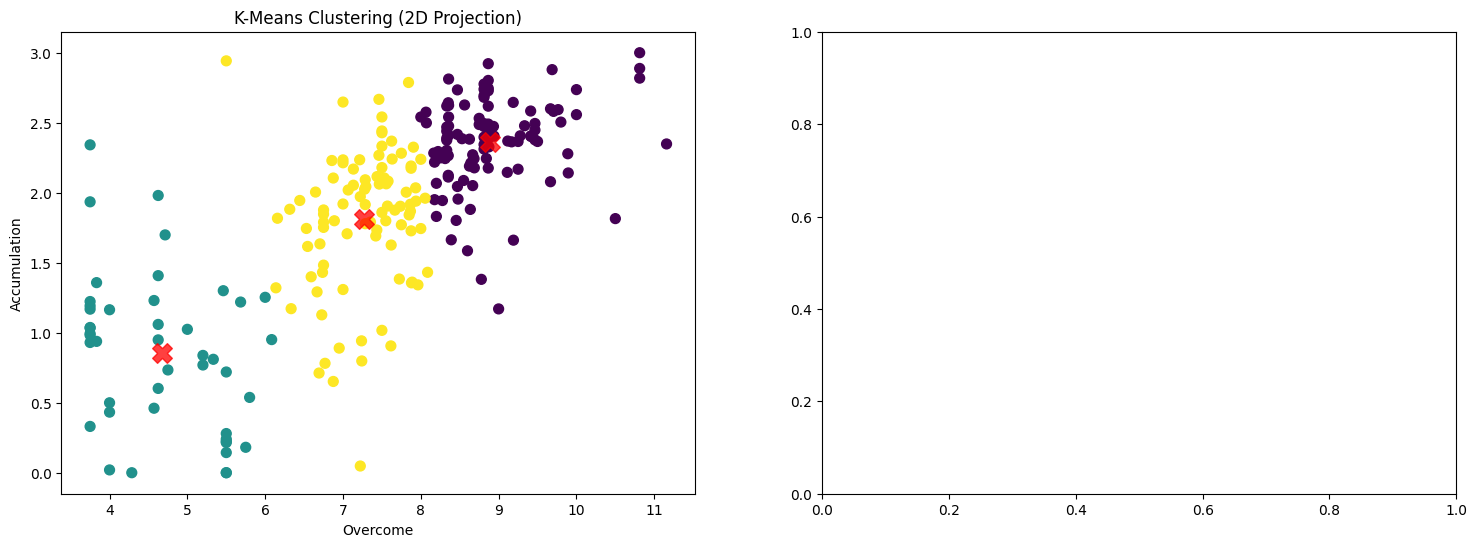

In [109]:
visualize(0)

['Overcome', 'Accumulation']
[0]


IndexError: list index out of range

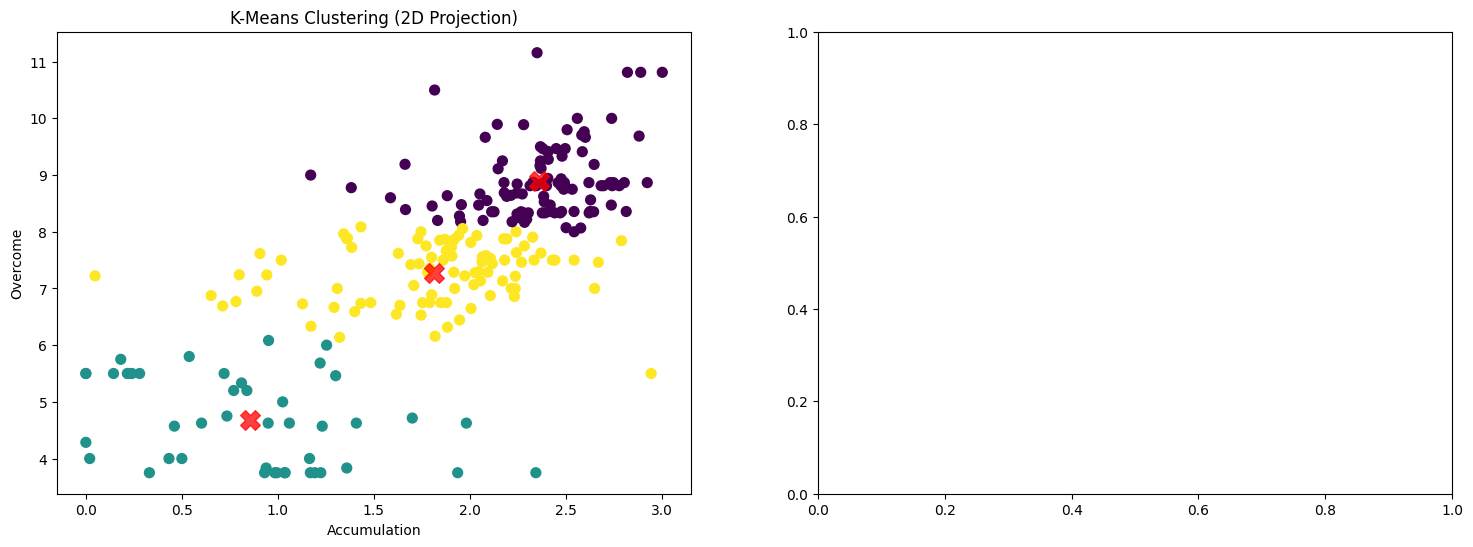

In [110]:
visualize(1)

['Overcome', 'Accumulation', 'Gender']
[0, 1]


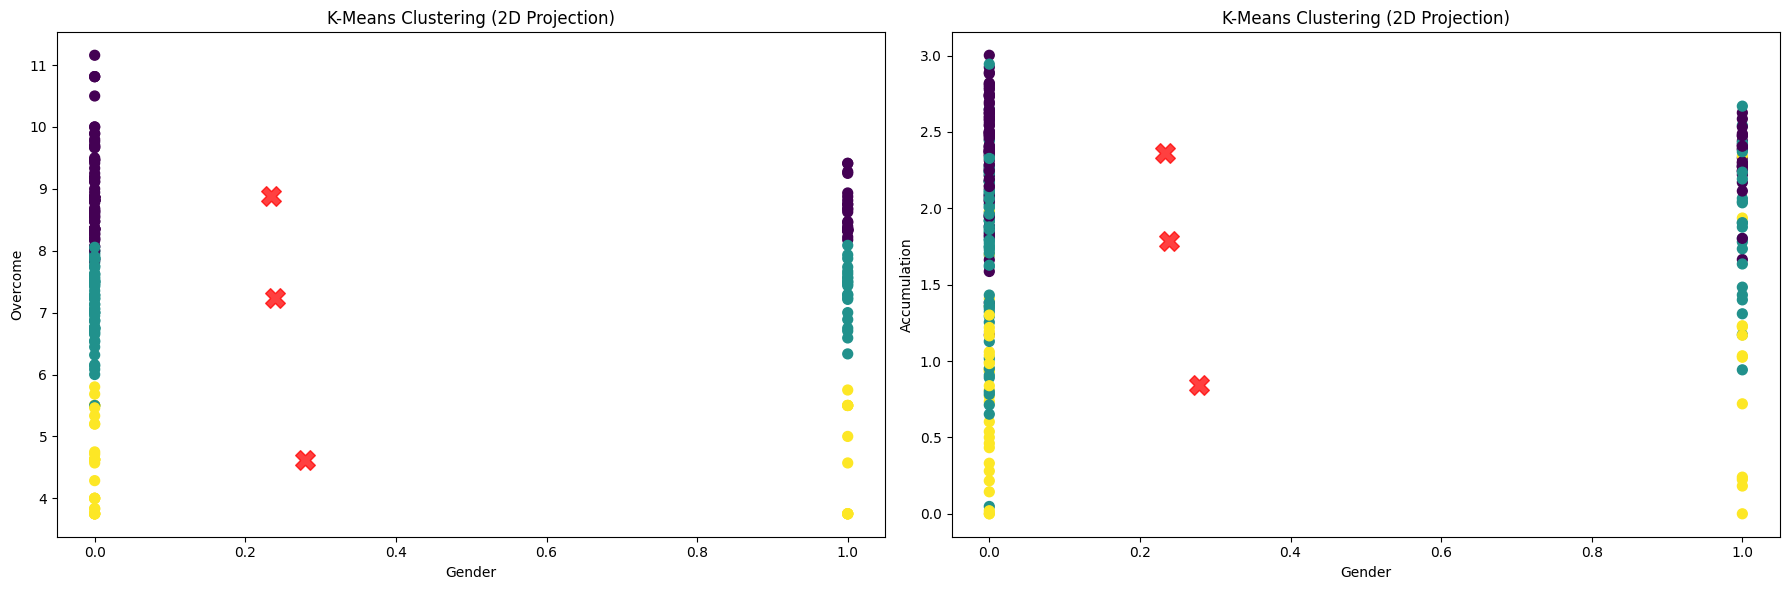

In [ ]:
visualize(2)